Credit Card Fraud Detection by Francisco Paz

Primero cargamos las librerias necesarias para hacer el analisis, la visualizacion y la construccion de modelos de datos.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_recall_curve, average_precision_score

EDA.

In [36]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
df.isnull().sum()# Revisamos si hay valores nulos

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Visualizamos la distribucion de clases para entender el balance entre fraude y no fraude. 

Class
0    284315
1       492
Name: count, dtype: int64


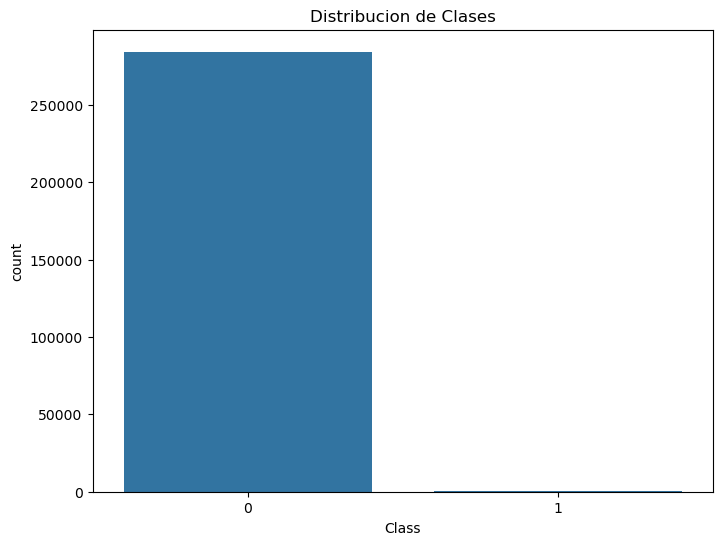

In [42]:
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribucion de Clases')
plt.show()

Separacion Funcion-Objetivo y division de datos.

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para mejorar la perfomance del modelo escalamos las caracteristicas con StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Construimos y entrenamos un modelo de regresion logistica

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))

[[56854    10]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9990695551420246
Precision: 0.8461538461538461
Recall: 0.5612244897959183
F1-Score: 0.6748466257668712


Implementamos dos algoritmos de deteccion de anomalias no supervisados (Isolation Forest Amd Local Outlier Factor LOF)

In [44]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Convert -1 to 1 (fraud) and 1 to 0 (normal)
y_pred_if = np.where(y_pred_if == -1, 1, 0)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

# Evaluate both models
print("Isolation Forest:")
print(confusion_matrix(y, y_pred_if))
print(classification_report(y, y_pred_if))

Isolation Forest:
[[281755   2560]
 [   203    289]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.59      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807



In [46]:
print("\nLocal Outlier Factor:")
print(confusion_matrix(y, y_pred_lof))
print(classification_report(y, y_pred_lof))



Local Outlier Factor:
[[281540   2775]
 [   418     74]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.03      0.15      0.04       492

    accuracy                           0.99    284807
   macro avg       0.51      0.57      0.52    284807
weighted avg       1.00      0.99      0.99    284807



Calculamos la relacion entre las caracteristicas y las visualizamos en un mapa de calor

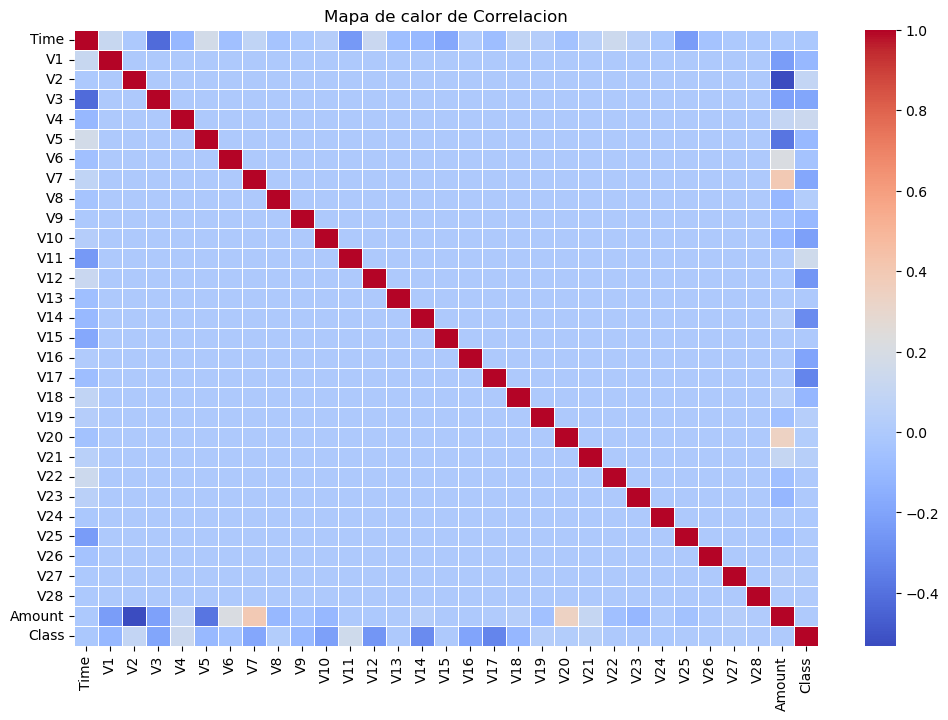

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Mapa de calor de Correlacion')
plt.show()

Visualizamos la distribucion de las primeras 5 caracteristicas (V1 a V5) para ambas clases -Fraude , No Fraude-

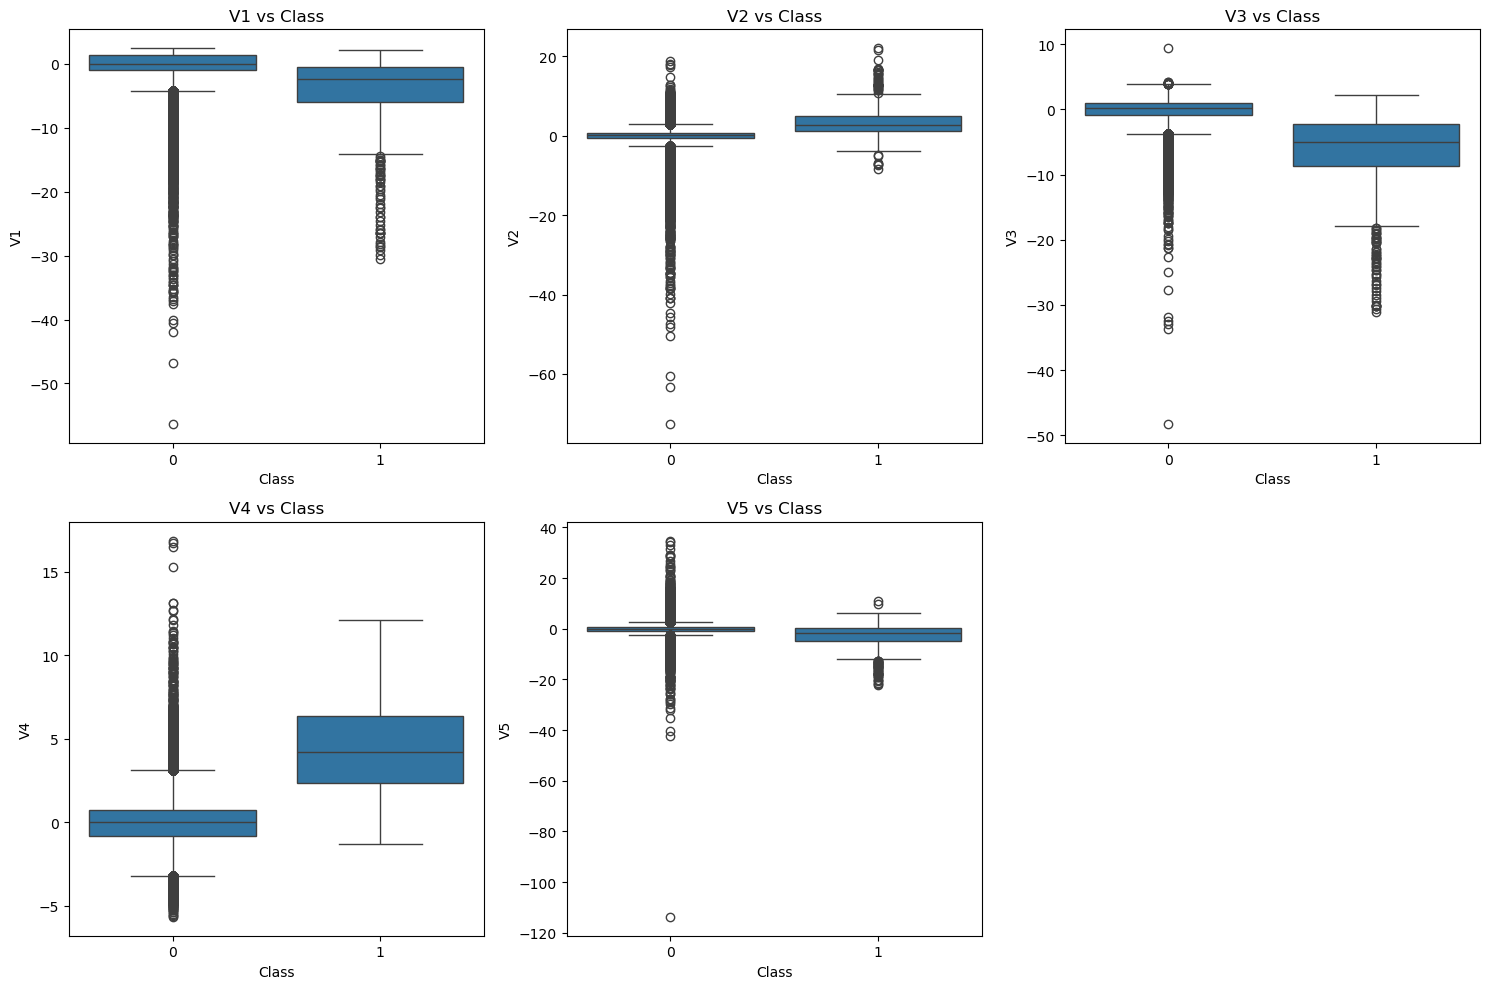

In [50]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

A simple vista, podemos observar que V4 tiene una caja y mediana mas alta para la deteccion de fraude 

Separamos las transacciones de Fraude - No Fraude, y mostramos las estadisticas descriptivas de ambas

In [52]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print("Fraud Transactions:")
print(fraud.describe())

print("\nNon-Fraud Transactions:")
print(non_fraud.describe())

Fraud Transactions:
                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6.406267  -43.

Comparamos la perfomance de los modelos.

In [56]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Isolation Forest', 'Local Outlier Factor'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y, y_pred_if), accuracy_score(y, y_pred_lof)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y, y_pred_if), precision_score(y, y_pred_lof)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y, y_pred_if), recall_score(y, y_pred_lof)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y, y_pred_if), f1_score(y, y_pred_lof)]
})

print(results)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.999070   0.846154  0.561224  0.674847
1      Isolation Forest  0.990299   0.101439  0.587398  0.173002
2  Local Outlier Factor  0.988789   0.025974  0.150407  0.044298


Visualizamos la distribucion de los montos de las transacciones para ambas clases.

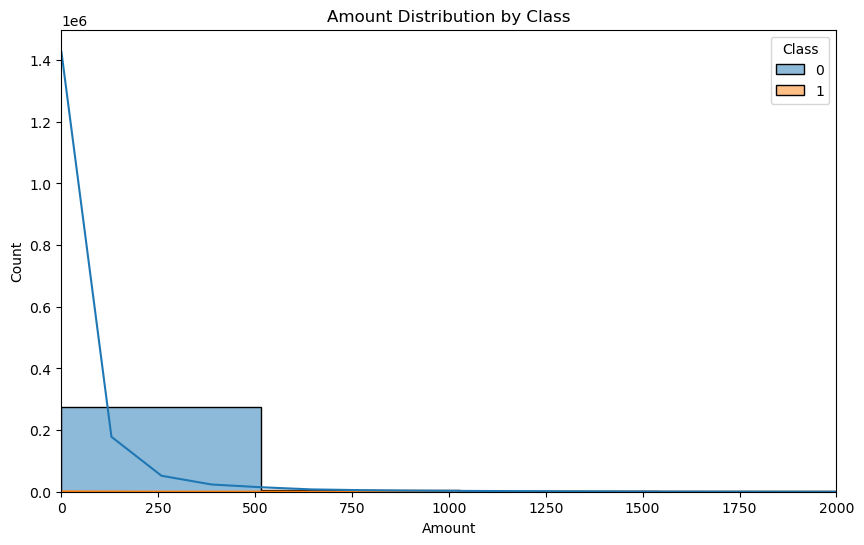

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, kde=True)
plt.title('Amount Distribution by Class')
plt.xlim(0, 2000)
plt.show()

Dada la relacion de desequilibrio de clases, se recomienda medir la precision utilizando el area bajo la curva de recuperacion de precision (AUPRC). La matriz de confusion no es significativa para la clasificacion desbalanceada.

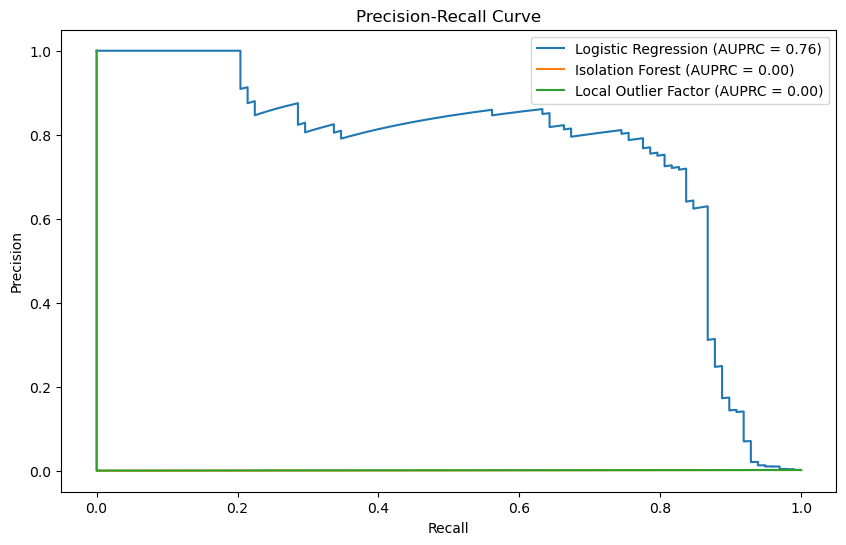

                  Model  Accuracy  Precision    Recall  F1-Score     AUPRC
0   Logistic Regression  0.999070   0.846154  0.561224  0.674847  0.756735
1      Isolation Forest  0.990299   0.101439  0.587398  0.173002  0.000877
2  Local Outlier Factor  0.988789   0.025974  0.150407  0.044298  0.001003


In [83]:
# Calcular las probabilidades de predicción para los modelos
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Para el Isolation Forest
y_pred_prob_if = isolation_forest.decision_function(X)  # Este método devuelve una puntuación
# Normaliza la puntuación para obtener una probabilidad
y_pred_prob_if = (y_pred_prob_if - y_pred_prob_if.min()) / (y_pred_prob_if.max() - y_pred_prob_if.min())

# Para Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Obtener las puntuaciones de outlier (negative_outlier_factor_)
y_pred_prob_lof = lof.negative_outlier_factor_

# Normaliza la puntuación para obtener una probabilidad
# Los valores más negativos indican un mayor outlier. Invertimos la escala para que los outliers sean más altos.
y_pred_prob_lof = (y_pred_prob_lof - y_pred_prob_lof.min()) / (y_pred_prob_lof.max() - y_pred_prob_lof.min())

# Convertir las predicciones en clases (invertir la lógica para que -1 se convierta en 1 y 1 en 0)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

# Calcular la curva de precisión-recall y el AUPRC
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_prob_lr)
auprc_lr = average_precision_score(y_test, y_pred_prob_lr)

precision_if, recall_if, _ = precision_recall_curve(y, y_pred_prob_if)
auprc_if = average_precision_score(y, y_pred_prob_if)

precision_lof, recall_lof, _ = precision_recall_curve(y, y_pred_prob_lof)
auprc_lof = average_precision_score(y, y_pred_prob_lof)

# Visualizar la curva de precisión-recall
plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label='Logistic Regression (AUPRC = {:.2f})'.format(auprc_lr))
plt.plot(recall_if, precision_if, label='Isolation Forest (AUPRC = {:.2f})'.format(auprc_if))
plt.plot(recall_lof, precision_lof, label='Local Outlier Factor (AUPRC = {:.2f})'.format(auprc_lof))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Agregar AUPRC a los resultados
results['AUPRC'] = [auprc_lr, auprc_if, auprc_lof]
print(results)



El gráfico sugiere que, de los tres modelos, la regresión logística tiene el mejor equilibrio entre precisión y recall, lo que la convierte en la opción preferida para este problema de detección de fraudes. Aunque Isolation Forest y LOF tienen potencial para detectar anomalías, parecen tener más dificultades para mantener un buen balance entre precisión y recall.